In [5]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import multivariate_normal

In [9]:
np.random.seed(42)
x = np.vstack([
    np.random.multivariate_normal([0,0],np.eye(2),50),
    np.random.multivariate_normal([4,4],np.eye(2),50)
])

N,D = x.shape
K=2

In [10]:
means = np.random.rand(K,D) * 5
covs = np.array([np.eye(2),np.eye(2)])
weights = np.array([0.5,0.5])
resps = np.zeros((N,K))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


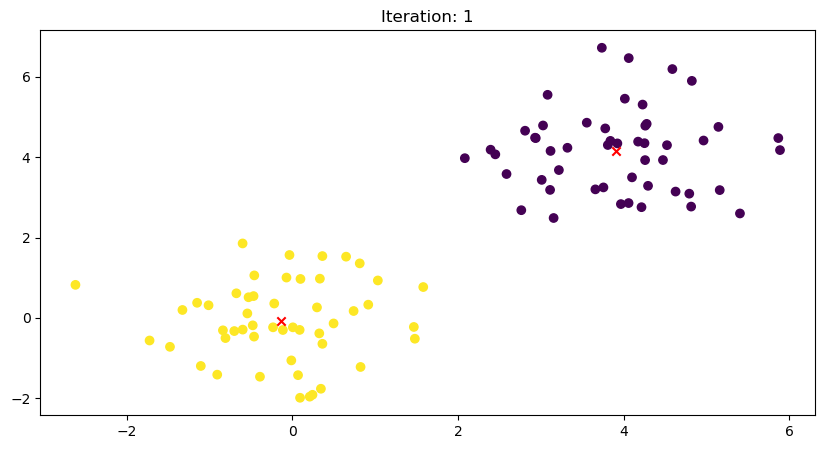

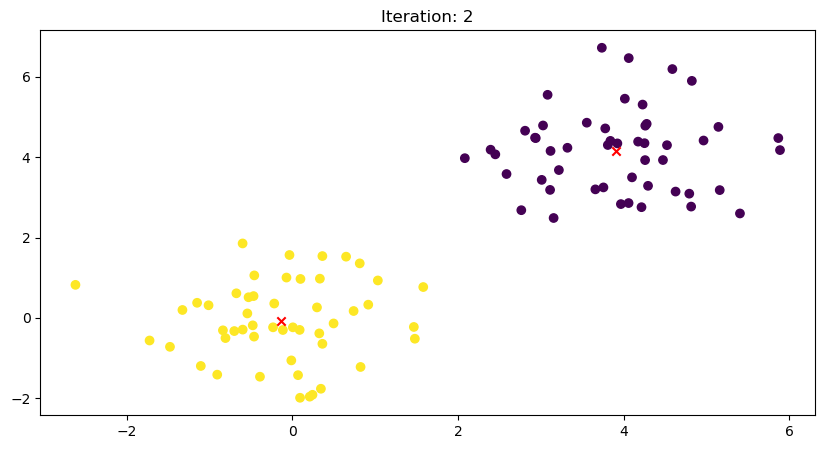

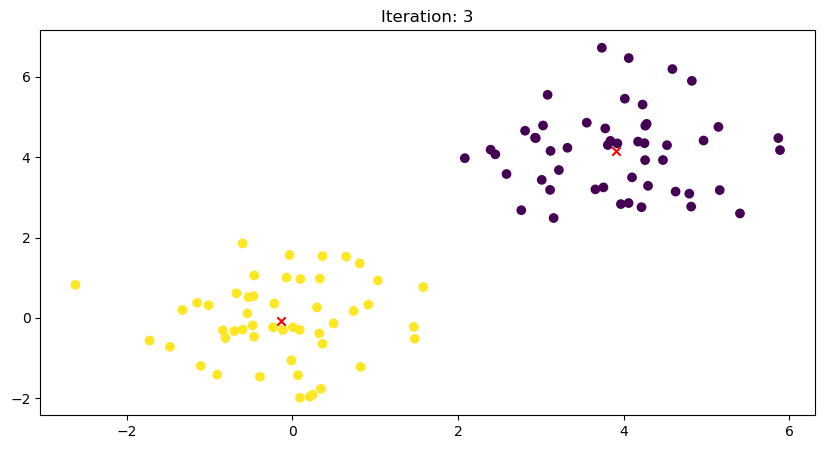

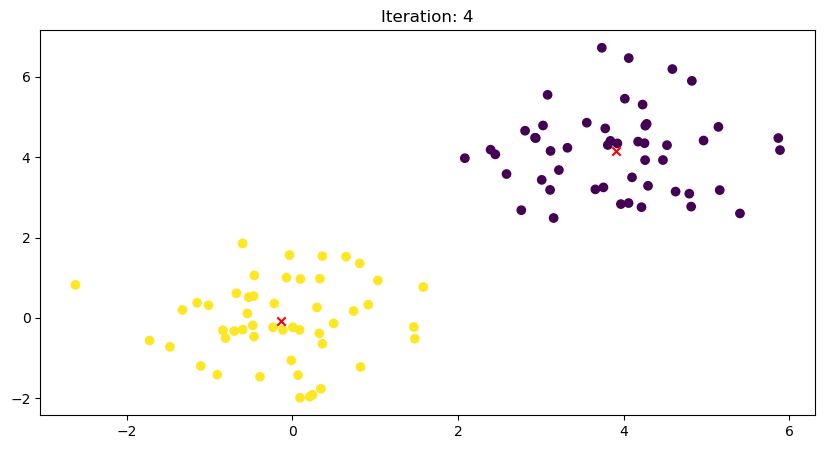

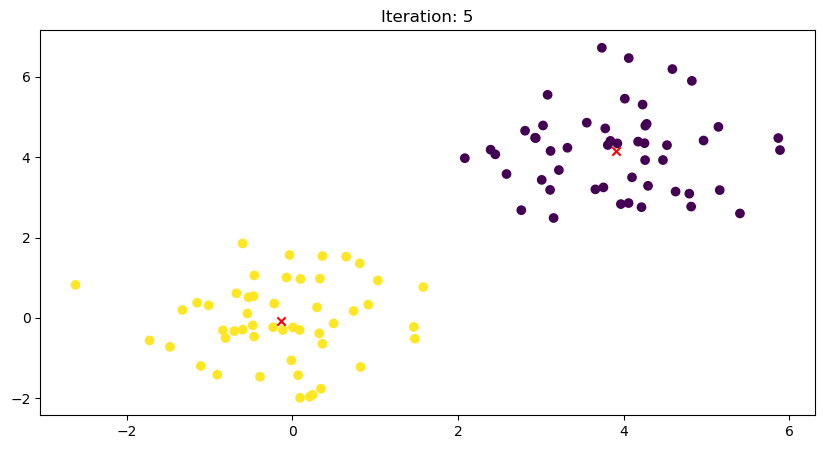

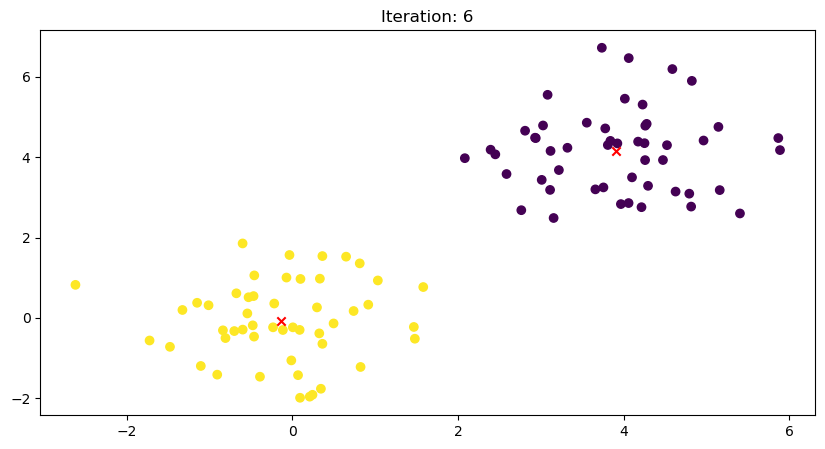

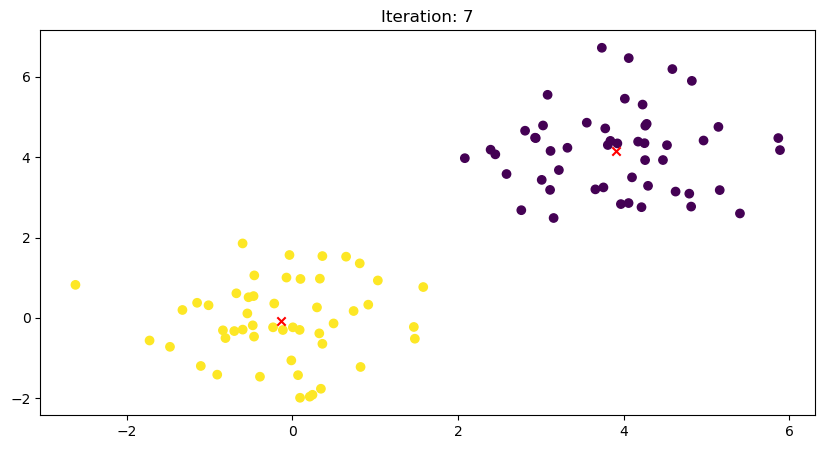

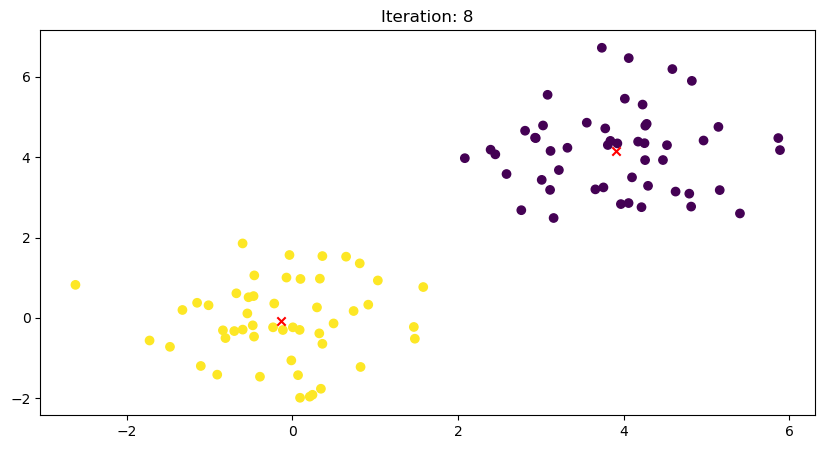

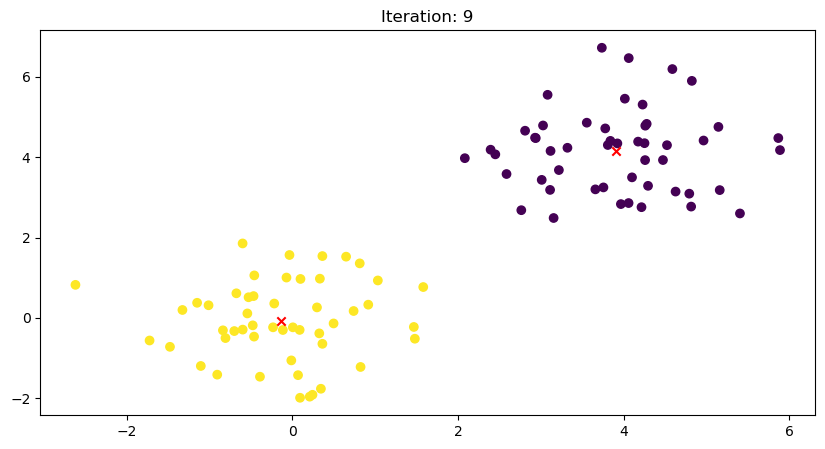

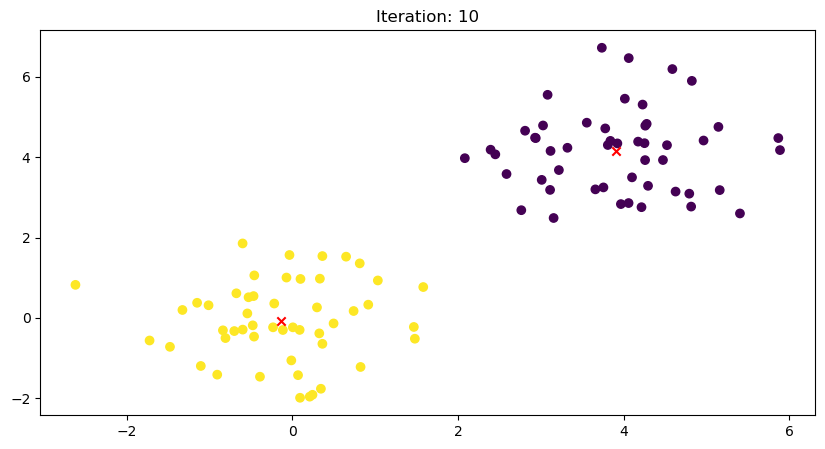

In [12]:
for i in range(10):
    for k in range(K):
        resps[:,k] = weights[k] * multivariate_normal.pdf(x,mean=means[k],cov=covs[k])
    resps = resps/resps.sum(axis=1, keepdims=True)

    for k in range(K):
        nk = resps[:,k].sum()
        means[k] = (resps[:,k,None]*x).sum(axis=0)/nk
        diff = x-means[k]
        covs[k] = np.dot((resps[:,k,None]*diff).T, diff)/nk
        weights[k] = nk/N

    plt.figure(figsize=(10,5))
    plt.scatter(x[:,0], x[:,1], c=np.argmax(resps,axis=1))
    plt.scatter(means[:,0], means[:,1], c='red', marker='x')
    plt.title(f"Iteration: {i+1}")

final = np.argmax(resps,axis=1)
print(final)